<a href="https://colab.research.google.com/github/Kareem2168/Well-Deliverability-/blob/main/Production_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns 
import missingno as msno #to detect missing values 

In [4]:
#we import these data which are very large 

filepath = "http://bit.ly/piopetro-data1"
df=pd.read_csv(filepath)
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,07-Apr-14,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,08-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,09-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,10-Apr-14,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,11-Apr-14,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,15-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,16-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,17-Sep-16,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [5]:
#now let us convert the dates 
df['DATEPRD']=pd.to_datetime(df['DATEPRD'], format='%d-%b-%y') #%d-%b-%y the order here depends on the original written data 

In [6]:
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production
15632,2016-09-17,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production


In [7]:
print(df['NPD_WELL_BORE_NAME']) #to get the well names 

0        15/9-F-1 C
1        15/9-F-1 C
2        15/9-F-1 C
3        15/9-F-1 C
4        15/9-F-1 C
            ...    
15629      15/9-F-5
15630      15/9-F-5
15631      15/9-F-5
15632      15/9-F-5
15633      15/9-F-5
Name: NPD_WELL_BORE_NAME, Length: 15634, dtype: object


In [8]:
print(df['NPD_WELL_BORE_NAME'].unique()) #in order not to see repeated names 

['15/9-F-1 C' '15/9-F-11' '15/9-F-12' '15/9-F-14' '15/9-F-15 D' '15/9-F-4'
 '15/9-F-5']


In [9]:
mask=df['NPD_WELL_BORE_NAME']=='15/9-F-14'
well14=df[mask]
well14 #we should reset the indexes 

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


In [10]:
well14.reset_index()

,index,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
1,4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
2,4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
3,4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4,4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
3052,8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
3053,8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
3054,8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


In [11]:
#now let us analyse 
well14.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,3056.000000,3050.000000,3050.000000,3050.000000,2533.000000,2860.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,3056.000000,0.0
mean,20.541194,233.074651,95.133791,192.653088,10.527985,69.390287,41.530601,77.103033,15.435755,1290.009817,189139.247382,2330.245746,NaN
std,7.881136,64.923765,25.846814,57.736987,9.704603,31.064576,22.719575,25.615707,19.965158,1298.363790,184204.112292,1462.922870,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,NaN
25%,24.000000,237.493000,99.621000,180.749500,0.000000,43.014158,31.020500,81.223500,2.665500,210.000000,31303.750000,695.500000,NaN
50%,24.000000,246.776000,101.007500,204.247500,12.969000,71.012955,33.546000,86.963500,7.177500,881.000000,142363.000000,2965.500000,NaN
75%,24.000000,261.971250,105.049000,229.632750,21.232000,100.000000,49.080250,88.539000,21.174000,2033.500000,305328.000000,3444.250000,NaN
max,25.000000,334.656000,106.773000,302.110000,26.682000,100.000000,125.719000,93.510000,125.719000,5644.000000,789975.000000,5692.000000,NaN


Text(0, 0.5, 'water volume')

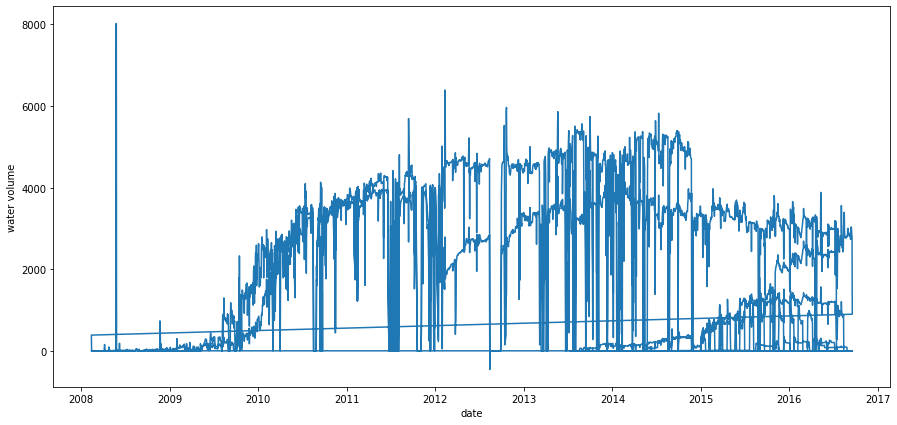

In [12]:
#lets plot water volume with time
fig=plt.figure(figsize=(15,7))
plt.plot(df['DATEPRD'], df['BORE_WAT_VOL'])
plt.xlabel('date')
plt.ylabel('water volume')


Text(0, 0.5, 'water volume')

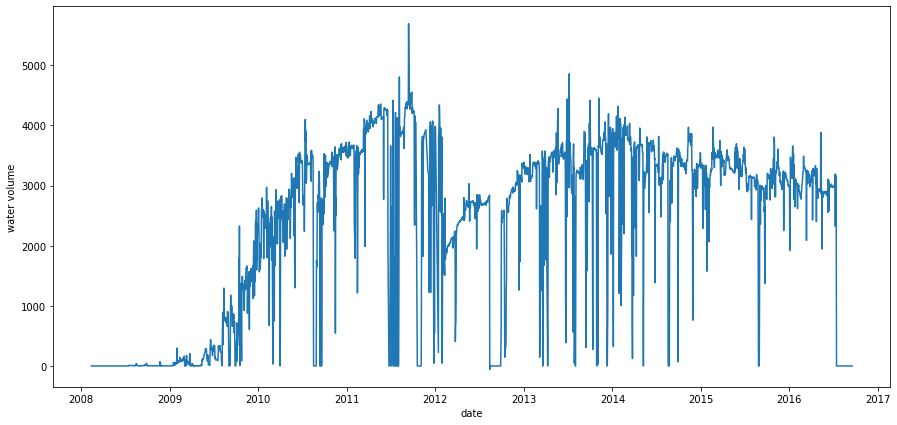

In [13]:
#for the well 14 only
fig=plt.figure(figsize=(15,7))
plt.plot(well14['DATEPRD'], well14['BORE_WAT_VOL'])
plt.xlabel('date')
plt.ylabel('water volume')

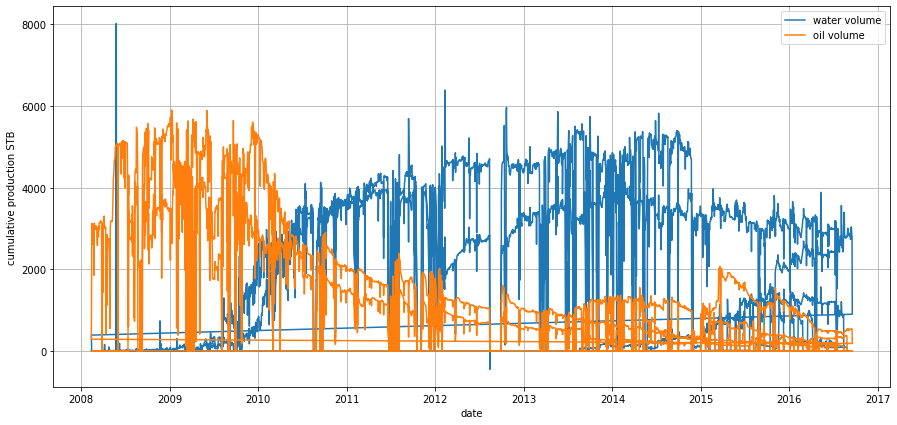

In [14]:
#plot it with oil volume
fig=plt.figure(figsize=(15,7))
plt.plot(df['DATEPRD'], df['BORE_WAT_VOL'], label='water volume')
plt.plot(df['DATEPRD'], df['BORE_OIL_VOL'], label='oil volume')
plt.xlabel('date')
plt.ylabel('cumulative production STB')
plt.legend()

plt.grid()

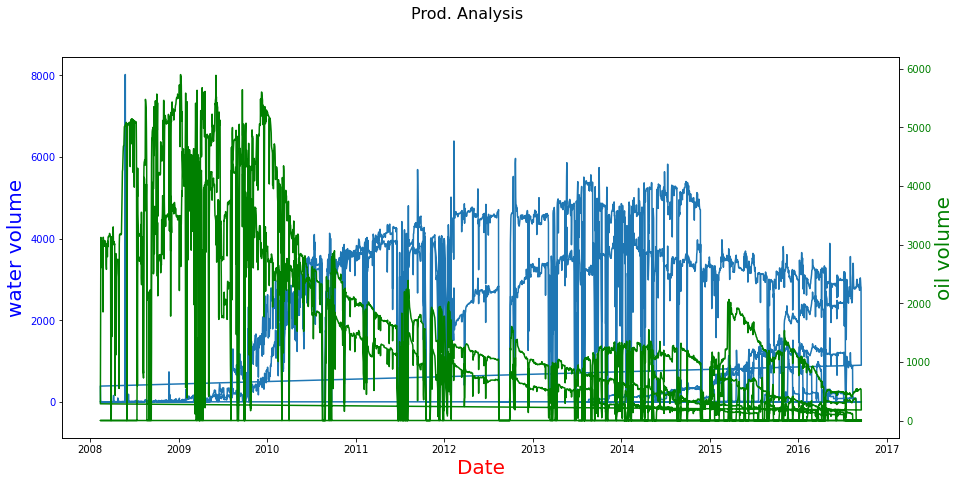

In [15]:
#we can also use the subplot to plot the data 

fig, ax=plt.subplots(sharex=True, figsize=(15,7))
fig.suptitle('Prod. Analysis', fontsize=16)



ax.plot(df['DATEPRD'], df['BORE_WAT_VOL'], )

ax.set_xlabel('Date', color='r', fontdict={'size':20})

ax.set_ylabel('water volume', color='blue', fontdict={'size':20})

ax.tick_params(axis='y', labelcolor='blue')

ax1=ax.twinx()

ax1.plot(df['DATEPRD'], df['BORE_OIL_VOL'], color='green')

ax1.set_ylabel('oil volume', color='green', fontdict={'size':20})

ax1.tick_params(axis='y', labelcolor='green')

In [16]:
#to make the same plot but using plotly
import plotly.express as px

In [17]:
import plotly.graph_objs as go
data=go.Line(x=df['DATEPRD'], y=df['BORE_WAT_VOL'], name='water volume')
data2=go.Line(x=df['DATEPRD'], y=df['BORE_OIL_VOL'], name='oil volume')
#data1=go.Line(y=df['BORE_WAT_VOL'], name='cumulative production STB')
#data2=go.Line(y=df['BORE_OIL_VOL'], name='cumulative production STB')
layout=go.Layout(title='production Analysis', xaxis=dict(title='date'), yaxis=dict(title='cumulative prod STB'))
figure=go.Figure(data=(data, data2), layout=layout)
figure

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  DeprecationWarning,


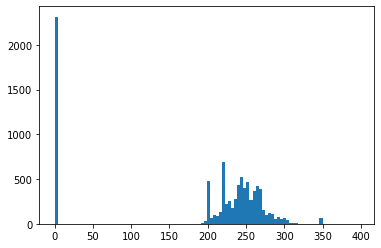

In [27]:
#for data distribution, use histograms
plt.hist(df['AVG_DOWNHOLE_PRESSURE'], bins=100)
plt.show()

#here the maximum value is 397 but it wasn't repeated many times so not clearly shown 
#x axis is the values of the avg downhole pressure anf on y axis the times it was repeated 
#the 0 value stands as an outlier 

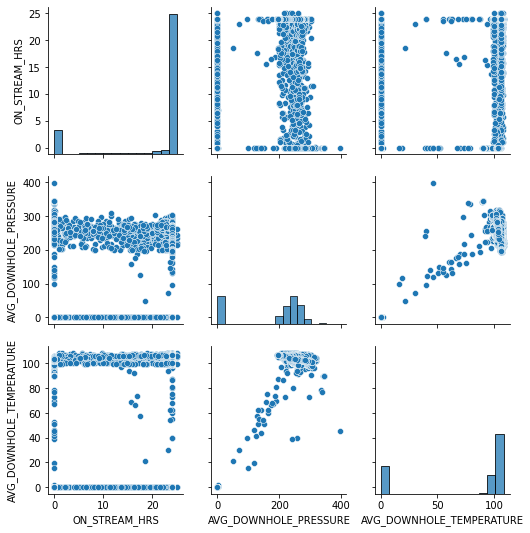

In [40]:
#plotting pair plot using seaborn

sns.pairplot(df[["ON_STREAM_HRS", "AVG_DOWNHOLE_PRESSURE", "AVG_DOWNHOLE_TEMPERATURE"]])

In [35]:
#I need to see for every feature its values on y axis on pair plot 
print(df["AVG_DOWNHOLE_TEMPERATURE"].max(),',', df["AVG_DOWNHOLE_PRESSURE"].max(), ',', df['ON_STREAM_HRS'].max())

108.502 , 397.589 , 25.0


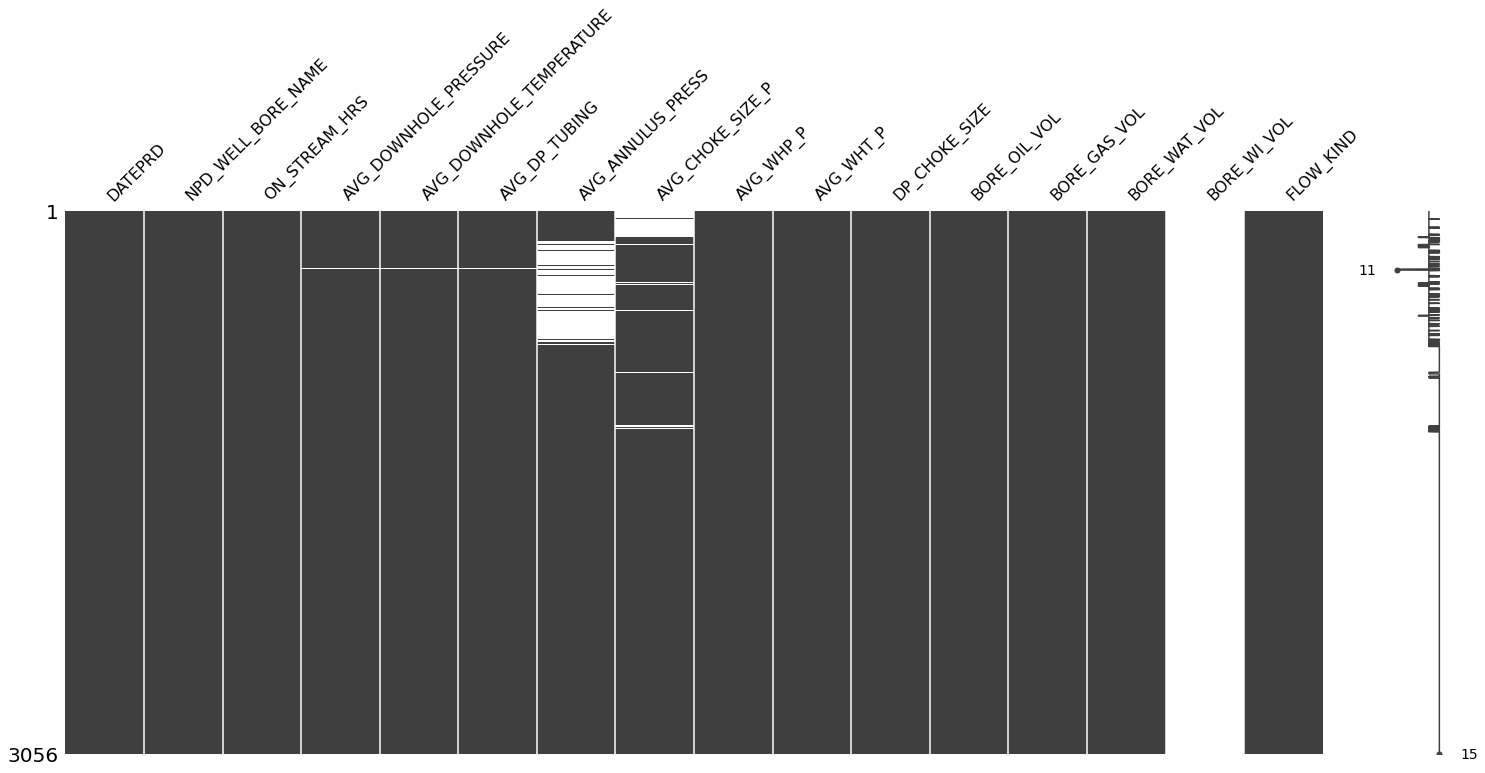

In [45]:
#now I will visualize missing data 
MSNO=msno.matrix(well14)

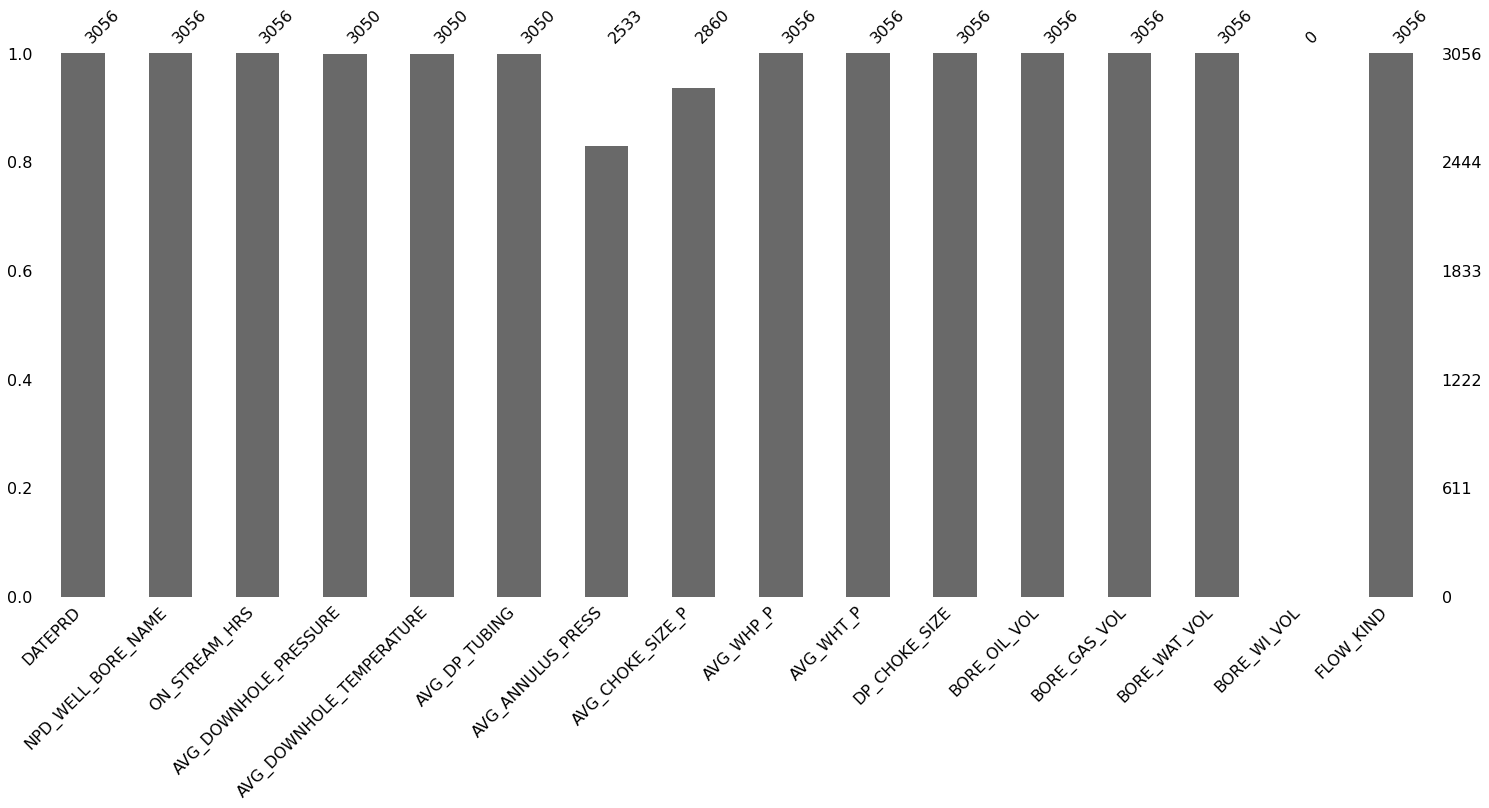

In [42]:
#msno.bar to see how many missing values in each column
#the values shown on each bar are the existing values and the rest are missing 
msno.bar(well14)

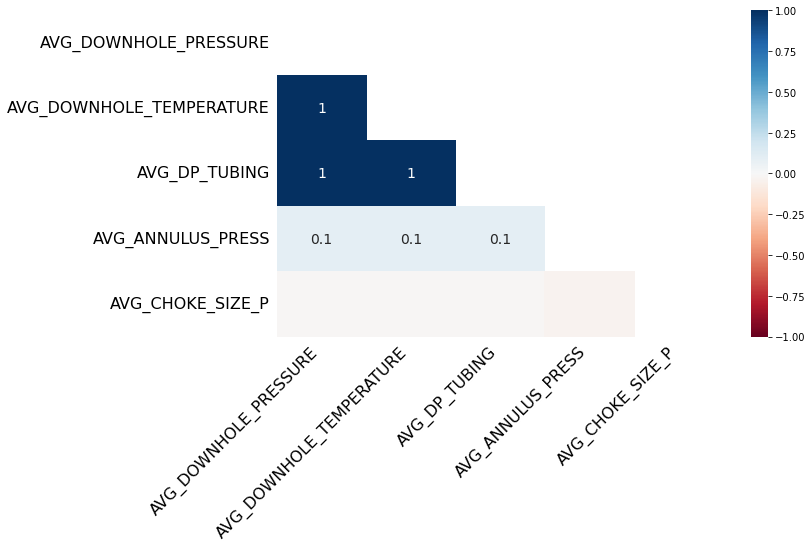

In [44]:
#using heatmap
msno.heatmap(well14, figsize=(10,6))

In [49]:
df=df.interpolate(method='pad')
df

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
1,2014-04-08,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,1.00306,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
2,2014-04-09,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.97901,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
3,2014-04-10,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.54576,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production
4,2014-04-11,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,15/9-F-5,0.0,345.907,90.034,345.907,0.273,0.63609,0.078,0.229,0.019,0.0,0.0,0.0,0.0,production
15630,2016-09-15,15/9-F-5,0.0,345.907,90.034,345.907,0.287,0.67079,0.085,0.229,0.006,0.0,0.0,0.0,0.0,production
15631,2016-09-16,15/9-F-5,0.0,345.907,90.034,345.907,0.286,0.66439,0.085,0.229,0.012,0.0,0.0,0.0,0.0,production
15632,2016-09-17,15/9-F-5,0.0,345.907,90.034,345.907,0.272,0.62466,0.075,0.228,0.026,0.0,0.0,0.0,0.0,production


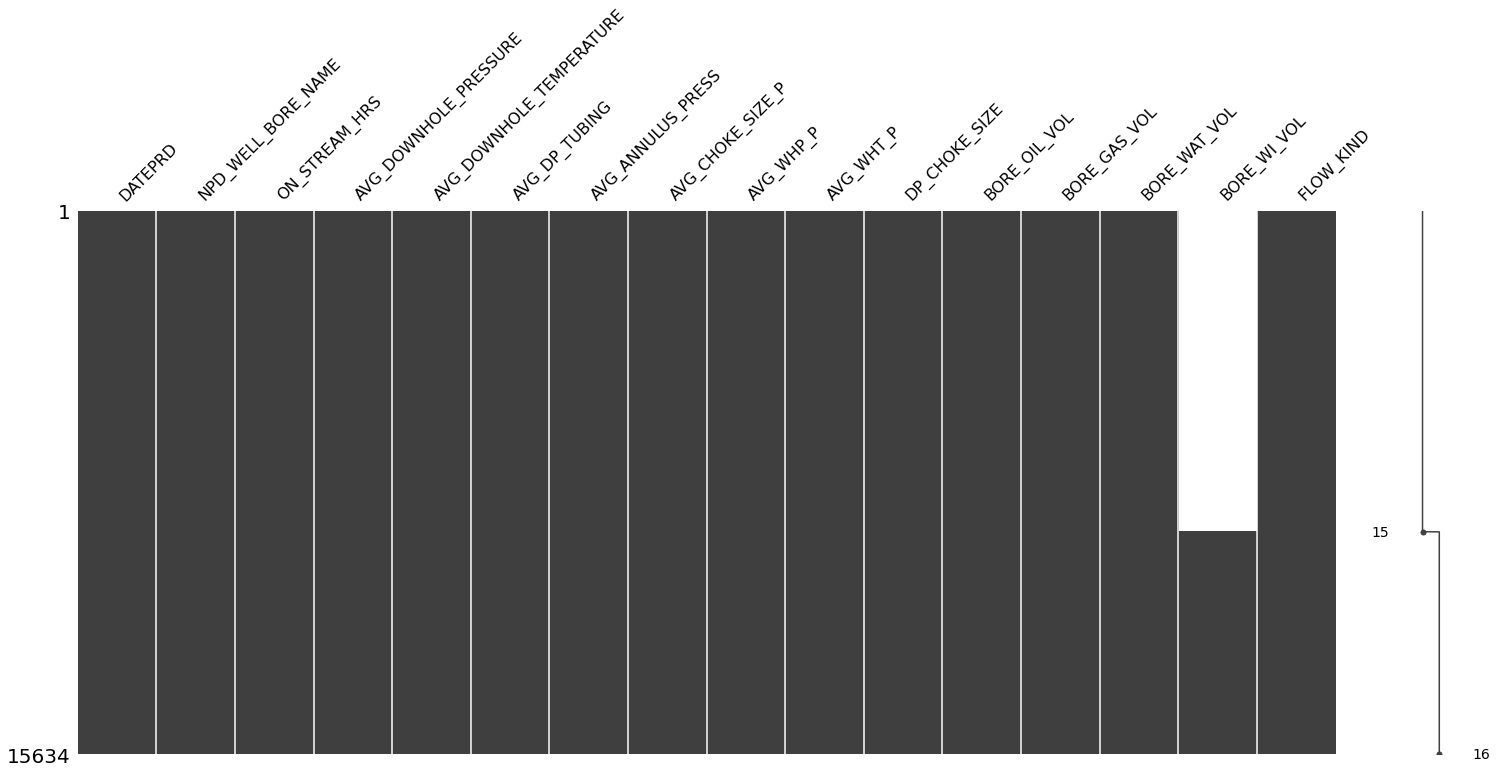

In [50]:
msno.matrix(df)

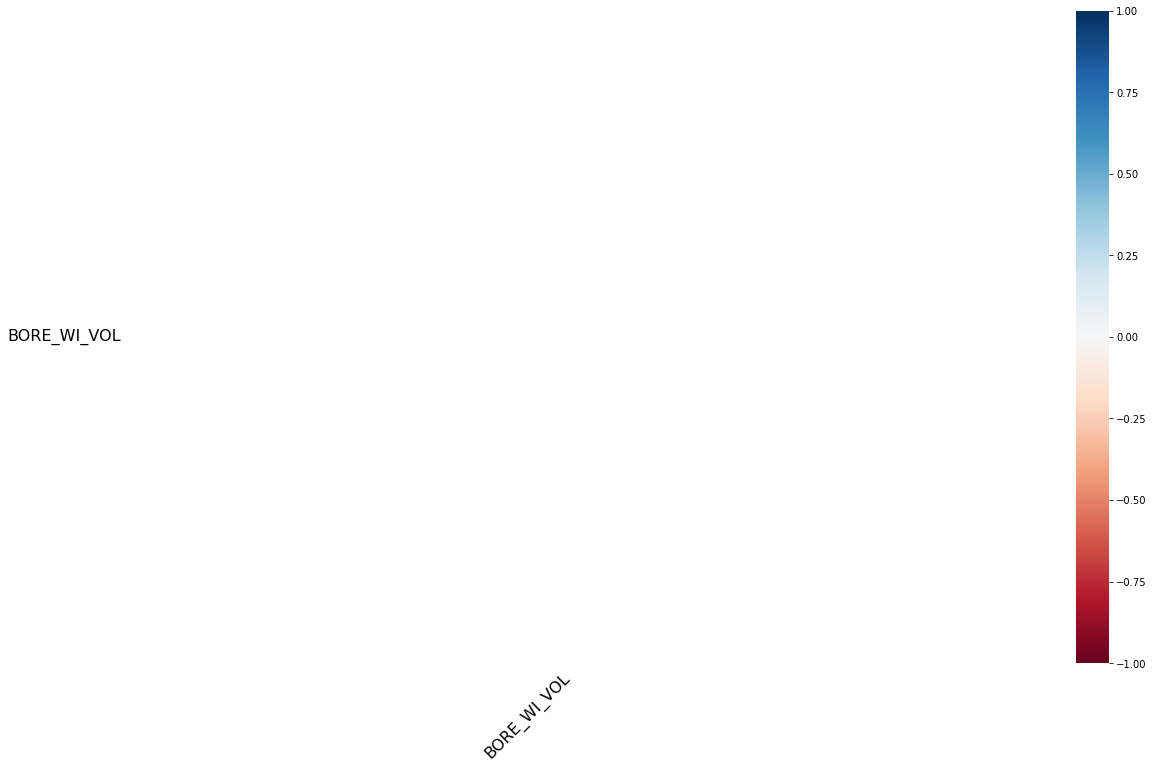

In [51]:
msno.heatmap(df)#nothing is shown since missing values are interpolated 
#same goes to bar

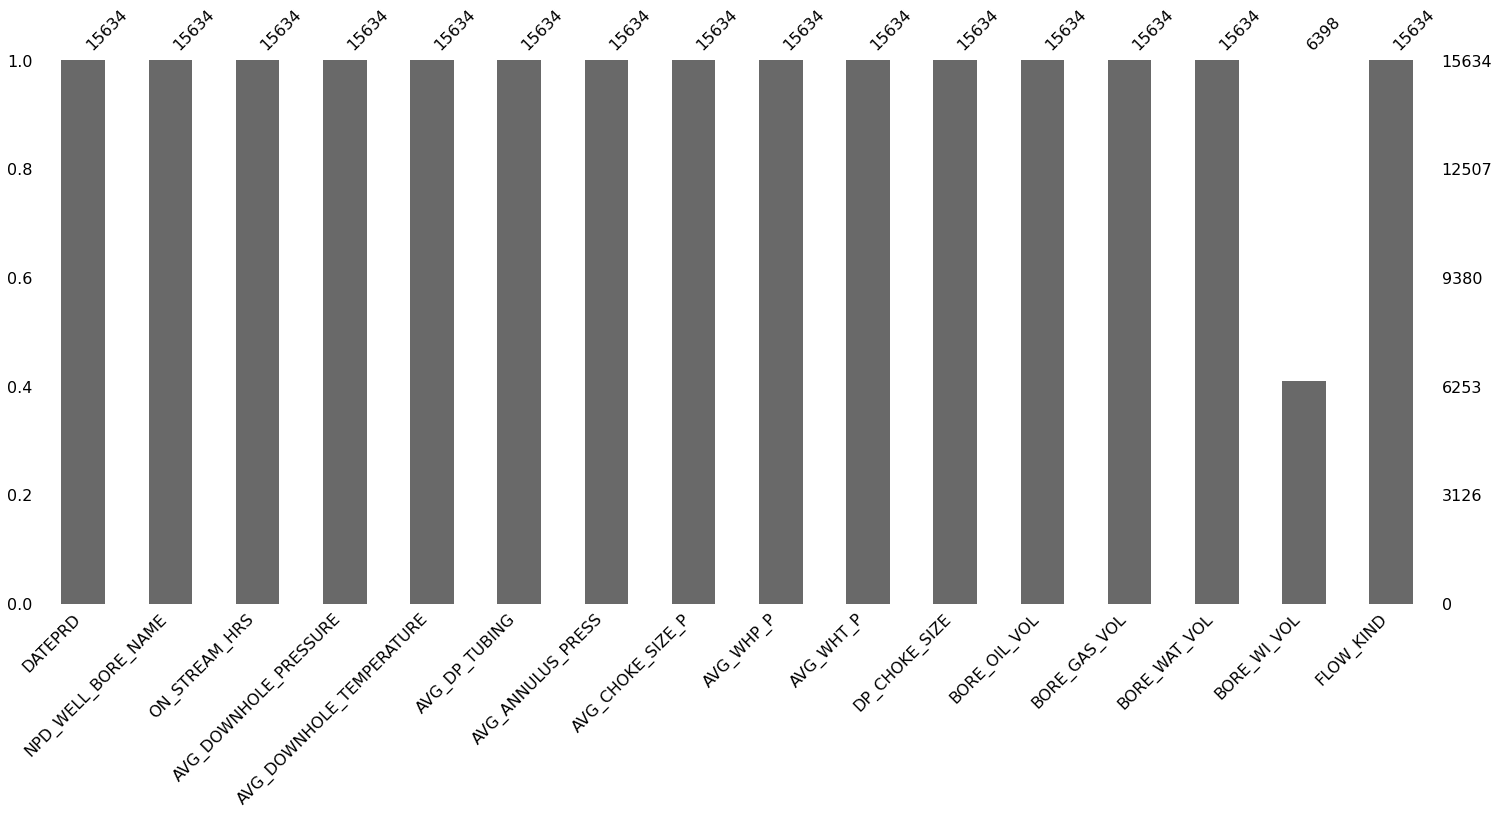

In [61]:
msno.bar(df)

In [55]:
well14.interpolate('bfill')

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND
4967,2008-02-12,15/9-F-14,0.0,0.0,0.0,0.000,0.000,0.00000,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production
4968,2008-02-13,15/9-F-14,0.0,0.0,0.0,0.000,0.000,0.00000,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production
4969,2008-02-14,15/9-F-14,0.0,0.0,0.0,0.000,0.000,0.00000,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production
4970,2008-02-15,15/9-F-14,0.0,0.0,0.0,0.000,0.000,0.00000,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production
4971,2008-02-16,15/9-F-14,0.0,0.0,0.0,0.000,0.000,0.00000,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,2016-09-13,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production
8019,2016-09-14,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production
8020,2016-09-15,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production
8021,2016-09-16,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production


examples of interpolation for missing values in 2 methods :
backfill or bfill
pad or ffill

In [56]:
#using bfill

#fills in backward direction
df1 = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})

In [57]:
df1

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [58]:
df1.interpolate('bfill')


,A,B,C,D
0,12.0,2.0,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,3.0,6.0
3,1.0,3.0,3.0,6.0
4,1.0,NaN,8.0,6.0


In [59]:
#using ffill
#it fills in forward direction 
df2 = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})

In [60]:
df2.interpolate('ffill')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,16.0,3.0
3,5.0,3.0,3.0,3.0
4,1.0,3.0,8.0,6.0
